#Final Project Version 0.3 | DA_73 | Vehicle Insurance Claim Fraud Detecion

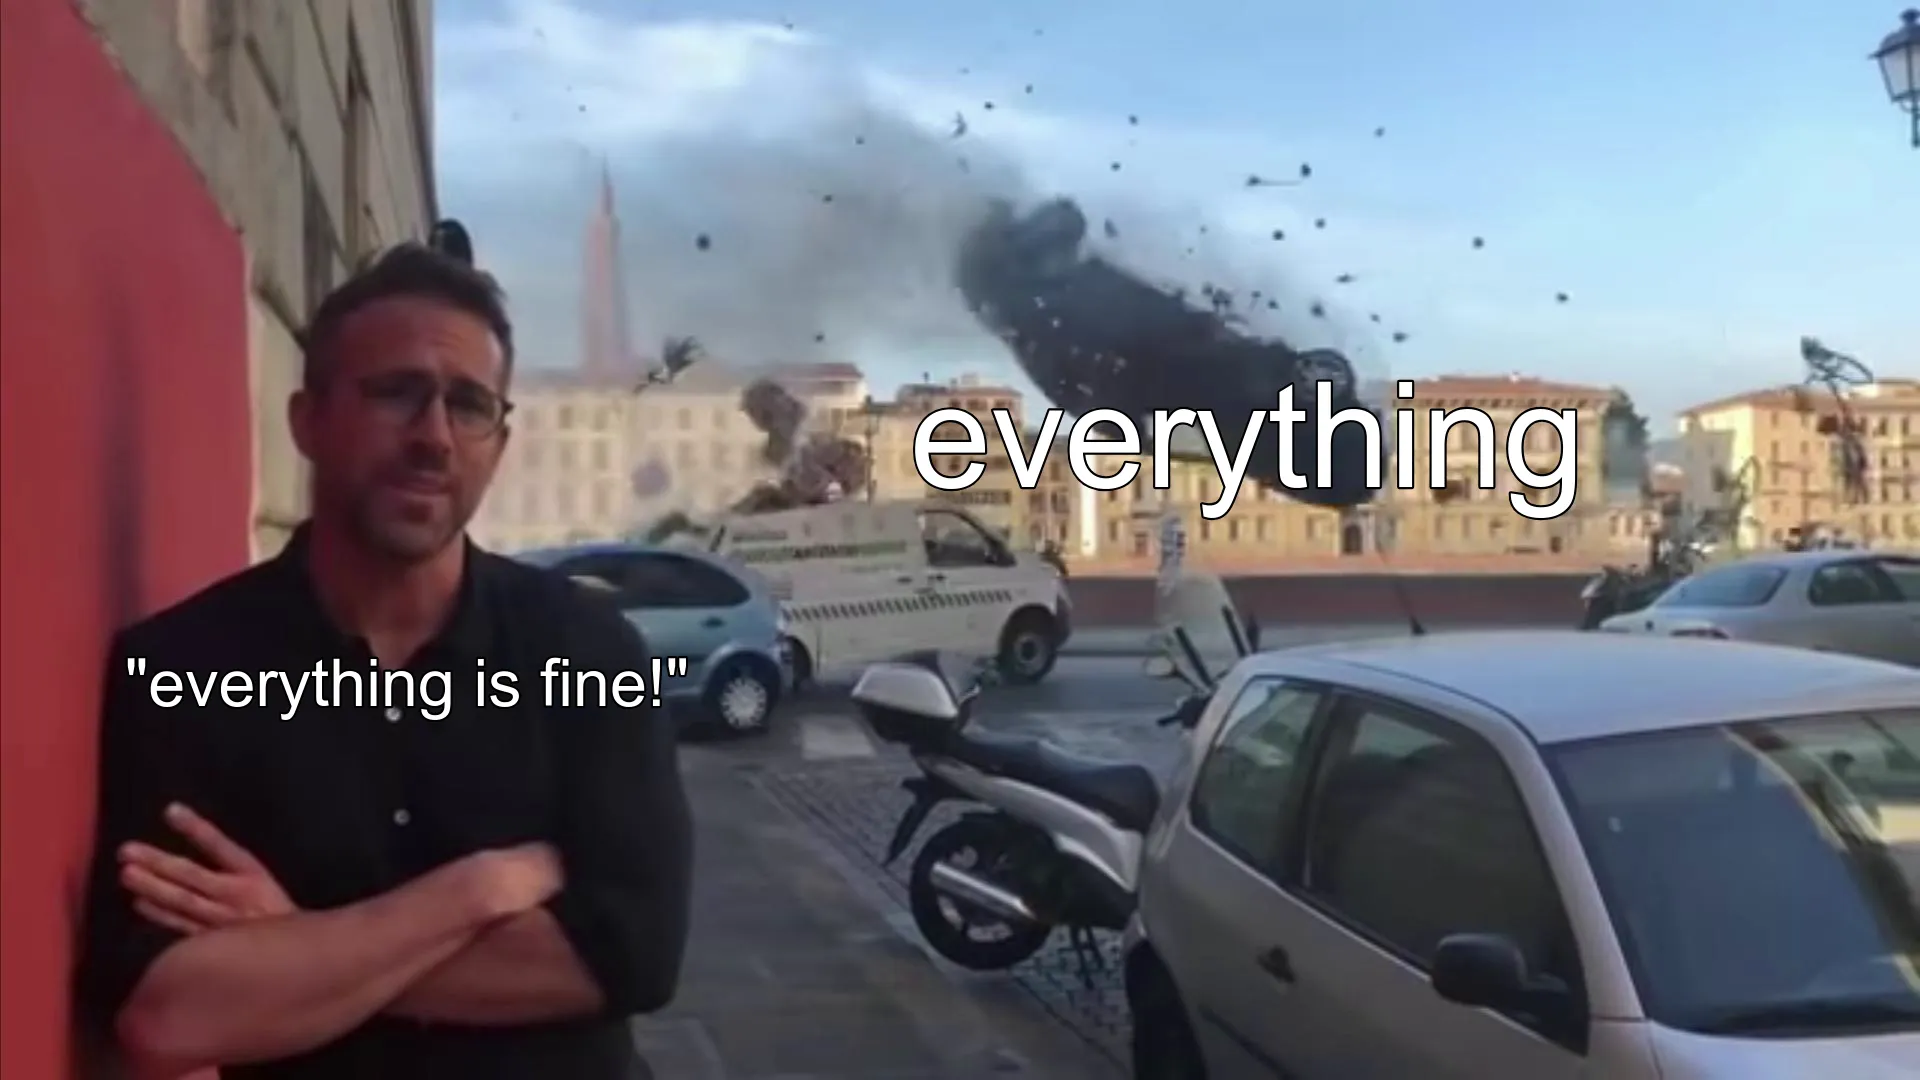

## 1. Chuẩn bị dữ liệu

In [ ]:
#import thư viện -> Get Data Ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

#import thư viện -> Modelling
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#random seed setup
import numpy as np
np.random.seed(42)

#import biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#import metrics đánh giá
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df_fraud = pd.read_csv("/content/drive/MyDrive/Khóa 3 - DS - MINDX/Self coding/Final Project MVP's/fraud_oracle.csv")
df_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df_fraud.shape

(15420, 33)

In [ ]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Data Dictionary:

**Month**: The month in which the insurance claim was made.

**WeekOfMonth**: The week of the month in which the insurance claim was made.

**DayOfWeek**: The day of the week on which the insurance claim was made.

**Make**: The manufacturer of the vehicle involved in the claim.

**AccidentArea**: The area where the accident occurred (e.g., urban, rural).

**DayOfWeekClaimed**: The day of the week on which the insurance claim was processed.

**MonthClaimed**: The month in which the insurance claim was processed.

**WeekOfMonthClaimed**: The week of the month in which the insurance claim was processed.

**Sex**: The gender of the policyholder.

**MaritalStatus**: The material status of the policyholder.

**Age**: The age of the policyholder.

**Fault**: Indicates whether the policyholder was at fault in the accident.

**PolicyType**: The type of insurance policy (e.g., comprehensive, third-party).

**VehicleCategory**: The category of the vehicle (e.g., sedan, SUV).

**VehiclePrice**: The price of vehicle.

**FraudFound_P**: Indicates whether fraud was detected in the insurance claim.

**PolicyNumber**: The unique identifier for the insurance policy.

**RepNumber**: The unique identifier for the insurance representative handling the claim.

**Deductible**: The amount that the policy holder must pay out of pocket before the insurance company pays the remaining costs.

**DriverRating**: The rating of the driver, often based on driving history or other factors.

**Days_Policy_Accident**: The number of days since the policy was issued until the accident occurred.

**Days_Policy_Claim**: The number of days since the policy was issued until the claim was made.

**PastNumberOfClaims**: The number of claims previously made by the policyholder.

**AgeOfVehicle**: The age of the vehicle involved in the claim.

**AgeOfPolicyHolder**: The age of the policyholder.

**PoliceReportFiled**: Indicates whether a police report was filed for the accident.

**WitnessPresent**: Indicates whether a witness was present at the scene of the accident.

**AgentType**: The type of insurance agent handling the policy (e.g., internal, external)

**NumberOfSuppliments**: The number of supplementary documents or claims related to the main claim, categorized into ranges.

**AddressChange_Claim**: Indicates whether the address of the policyholder was changed at the time of the claim, categorized into ranges.

**NumberOfCars**: The number of cars insured under the policy, categorized into ranges.

**Year**: The year in which the claim was made or processed.

**BasePolicy**: The base policy type (e.g., Liability, Collision, All Perils).

In [ ]:
#Kiểm tra giá trị trùng lặp
df_fraud.duplicated().sum()

0

## 2. Exploratory Data Analyst

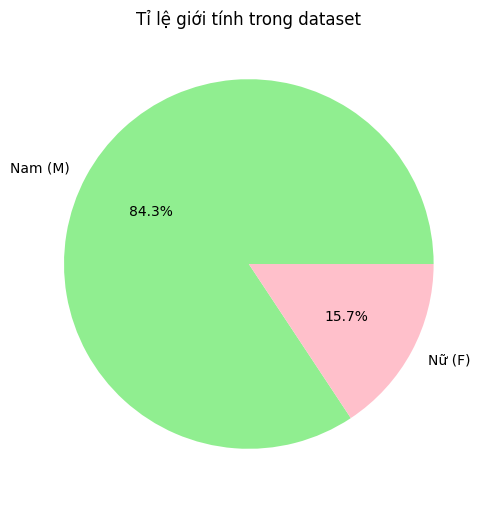

Số lượng theo giới tính:
Sex
Male      13000
Female     2420
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
gender_counts = df_fraud['Sex'].value_counts()
plt.pie(gender_counts, labels=['Nam (M)', 'Nữ (F)'],
        autopct='%1.1f%%', colors=['lightgreen', 'pink'])
plt.title('Tỉ lệ giới tính trong dataset')
plt.show()

# In ra số lượng cụ thể
print('\
Số lượng theo giới tính:')
print(gender_counts)

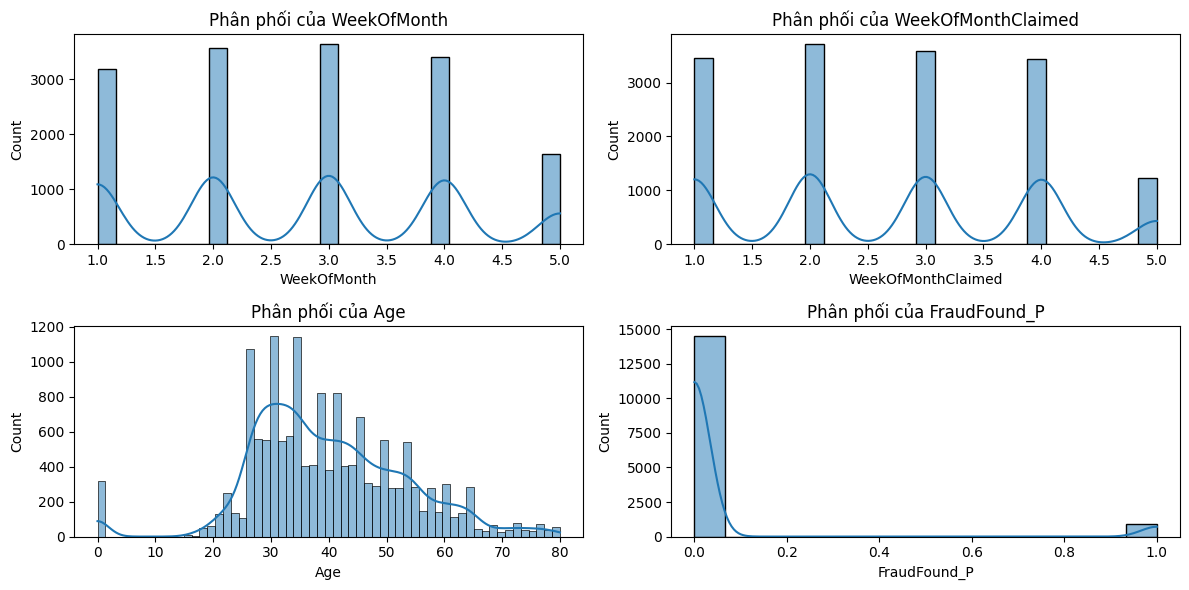

In [ ]:
num_columns = df_fraud.select_dtypes(include=['int64', 'float64']).columns.tolist()
if num_columns:
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(num_columns[:4]):
        plt.subplot(2, 2, i+1)
        sns.histplot(df_fraud[col], kde=True)
        plt.title(f'Phân phối của {col}')
    plt.tight_layout()
    plt.show()

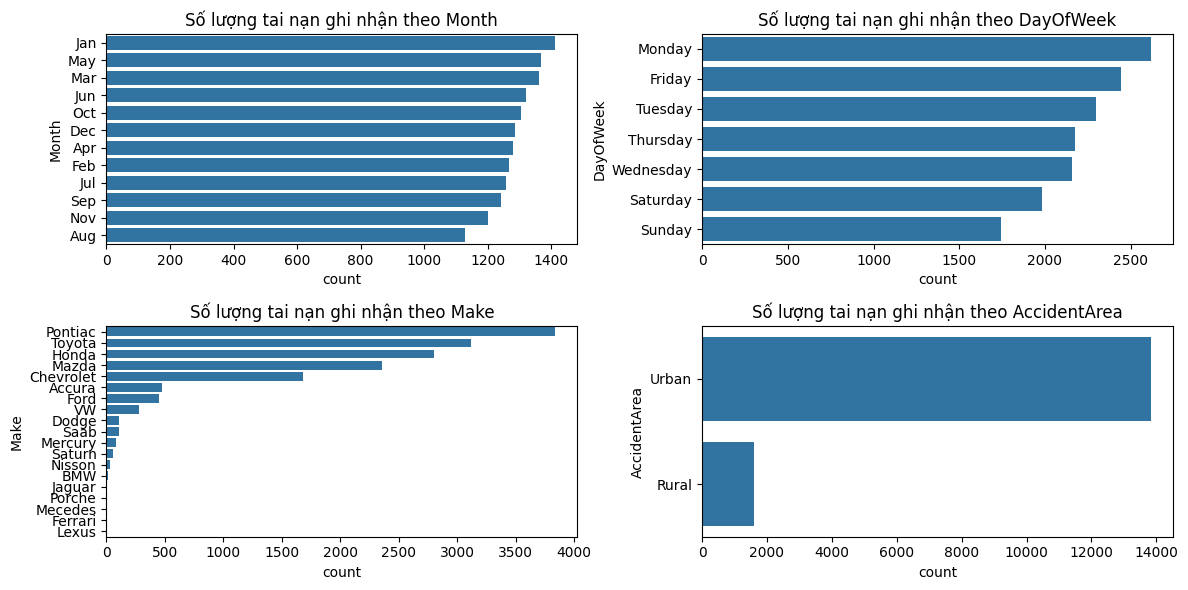

In [ ]:
cat_columns = df_fraud.select_dtypes(include=['object']).columns.tolist()
if cat_columns:
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(cat_columns[:4]):
        plt.subplot(2, 2, i+1)
        sns.countplot(y=df_fraud[col], order=df_fraud[col].value_counts().index)
        plt.title(f'Số lượng tai nạn ghi nhận theo {col}')
    plt.tight_layout()
    plt.show()

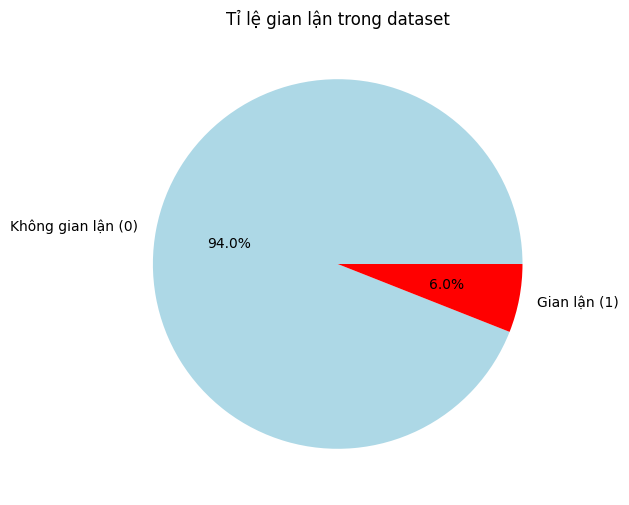

Số lượng cụ thể:
FraudFound_P
0    14497
1      923
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
fraud_counts = df_fraud['FraudFound_P'].value_counts()
plt.pie(fraud_counts, labels=['Không gian lận (0)', 'Gian lận (1)'],
        autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title('Tỉ lệ gian lận trong dataset')
plt.show()

# In ra số lượng cụ thể
print('\
Số lượng cụ thể:')
print(fraud_counts)

### Fraud Detection by Policy Holder

In [ ]:
df_fraud_only = df_fraud[df_fraud['FraudFound_P'] == 1]
df_non_fraud = df_fraud[df_fraud['FraudFound_P'] == 0]

df_counts_ageofpolicyholder = df_fraud['AgeOfPolicyHolder'].value_counts().sort_index()
df_counts_fraud_ = df_fraud_only['AgeOfPolicyHolder'].value_counts().sort_index()

df_percentages_fraud_ = round((df_counts_fraud_ / df_counts_ageofpolicyholder) * 100, 2)

#Chart

fig = go.Figure()

fig.add_trace(go.Bar(x=df_percentages_fraud_.index, y=df_percentages_fraud_.values,
    marker_color='rgba(31, 119, 180, 0.7)'))

fig.update_layout(
    title={
        'text': 'Fraud Detection by Age of Policy Holder',
        'x':0.5,
        'font': {'family': "Arial, sans-serif", 'size': 24}
    })

fig.update_layout(
    xaxis=dict(title='Age of Policy Holder'), yaxis=dict(title='Percentage', range=[0, 20], dtick=2), legend=dict(title='Outcome'))

fig.add_shape(
    type="line",
    x0=-1,
    y0=6,
    x1=10,
    y1=6,
    line=dict(
        color="rgba(255, 0, 0, 0.8)",
        width=2,
        dash="dashdot",
    ),
)

fig.show()

### Fraud Detection by Make

In [ ]:
df_counts_make = df_fraud['Make'].value_counts().sort_index()
df_counts_fraud2 = df_fraud_only['Make'].value_counts().sort_index()
df_percentages_fraud2 = pd.DataFrame(round((df_counts_fraud2 / df_counts_make) * 100, 2)).fillna(0).reset_index()

df_percentages_fraud2.columns = ['Make', 'Fraud %']
df_percentages_fraud2 = df_percentages_fraud2.sort_values(by=['Fraud %', 'Make'])

#Chart

fig = go.Figure()

fig.add_trace(go.Bar(x=df_percentages_fraud2['Fraud %'], y=df_percentages_fraud2['Make'], orientation='h',
    marker_color='lightcoral'))

fig.update_layout(
    title={
        'text': 'Fraud Detection by Make',
        'x':0.5,
        'font': {'family': "Arial, sans-serif", 'size': 24}
    })

fig.update_layout(
    xaxis=dict(title='Percentage', range=[0, 30], dtick=2), yaxis=dict(title='Make'), legend=dict(title='Outcome'), bargap=0.3)

fig.add_shape(
    type="line",
    x0=6,
    y0=0,
    x1=6,
    y1=len(df_percentages_fraud2['Make']) - 1,
    line=dict(
        color="rgba(128, 128, 128, 1)",
        width=2,
        dash="dashdot",
    ),
)

fig.show()

### Fraud Detection by Vehicle Price

In [ ]:
df_counts_vp = df_fraud['VehiclePrice'].value_counts().sort_index()
df_counts_fraud3 = df_fraud_only['VehiclePrice'].value_counts().sort_index()
df_percentages_fraud3 = pd.DataFrame(round((df_counts_fraud3 / df_counts_vp) * 100, 2)).fillna(0).reset_index()

df_percentages_fraud3.columns = ['VehiclePrice', 'Fraud %']
df_percentages_fraud3 = df_percentages_fraud3.sort_values(by=['Fraud %'])

#Chart
fig = go.Figure()

fig.add_trace(go.Bar(x=df_percentages_fraud3['Fraud %'], y=df_percentages_fraud3['VehiclePrice'], orientation='h',
    marker_color='#9FF781'))

fig.update_layout(
    title={
        'text': 'Fraud Detection by VehiclePrice',
        'x':0.5,
        'font': {'family': "Arial, sans-serif", 'size': 24}
    })

fig.update_layout(
    xaxis=dict(title='Percentage', range=[0, 16], dtick=2), yaxis=dict(title='VehiclePrice'), legend=dict(title='Outcome'), bargap=0.3)

fig.add_shape(
    type="line",
    x0=6,
    y0=0,
    x1=6,
    y1=5.5,
    line=dict(
        color="rgba(0, 100, 0, 1)",
        width=2,
        dash="dashdot",
    ),
)

fig.show()

### Fraud Detection by Age of Vehicle

In [ ]:
df_counts_ageofvehicle = df_fraud['AgeOfVehicle'].value_counts().sort_index()
df_counts_fraud6 = df_fraud_only['AgeOfVehicle'].value_counts().sort_index()
df_percentages_fraud6 = pd.DataFrame(round((df_counts_fraud6 / df_counts_ageofvehicle) * 100, 2)).fillna(0).reset_index()

df_percentages_fraud6.columns = ['AgeOfVehicle', 'Fraud %']
df_percentages_fraud6 = df_percentages_fraud6.sort_values(by=['Fraud %'])

#Chart
fig = go.Figure()

fig.add_trace(go.Bar(x=df_percentages_fraud6['Fraud %'], y=df_percentages_fraud6['AgeOfVehicle'], orientation='h',
    marker_color='rgb(255, 165, 0)'))

fig.update_layout(
    title={
        'text': 'Fraud Detection by Age of Vehicle',
        'x':0.5,
        'font': {'family': "Arial, sans-serif", 'size': 24}
    })

fig.update_layout(
    xaxis=dict(title='Percentage', range=[0, 16], dtick=2), yaxis=dict(title='AgeOfVehicle'), legend=dict(title='Outcome'), bargap=0.3)

fig.add_shape(
    type="line",
    x0=6,
    y0=-1,
    x1=6,
    y1=8,
    line=dict(
        color="rgba(0, 100, 0, 1)",
        width=2,
        dash="dashdot",
    ),
)

fig.show()

## 3. Data Preprocessing





- Cột PolicyNumber không có giá trị về mặt thống kê, chúng ta có thể bỏ nó ra

In [ ]:
df_fraud.drop(["PolicyNumber"], axis = 1, inplace=True)

- Cột "Sex", "PoliceReportFiled", "WitnessPresent","AccidentalArea", "Fault","AgentType" là các cột chỉ có 2 giá trị, có thể sử dụng labelencoder để đưa về 0 và 1

In [ ]:
cols_to_encode = ['Sex', 'PoliceReportFiled', 'WitnessPresent',
                  'AccidentArea', 'Fault', 'AgentType']

# Áp dụng LabelEncoder cho từng cột
for col in cols_to_encode:
    le = LabelEncoder()
    df_fraud[col] = le.fit_transform(df_fraud[col])

- Cột DriverRating đã ở dạng số -> Không cần transform
- Cột VehiclePrice và cột AgeOfVehicle có thể chuyển thành dạng số vì chúng là Nominal Categorical Features dù nó giống Ordinal -> giải thích kĩ.

In [ ]:
vehicleprice_label = {'more than 69000': 1, '20000 to 29000': 0,  '30000 to 39000': 0, 'less than 20000': 1, '40000 to 59000': 1, '60000 to 69000': 0}
ageofvehicle_label = {'new': 2, '2 years': 0, '3 years': 2, '4 years': 2, '5 years': 1, '6 years': 1, '7 years': 0, 'more than 7': 0}
basepolicy_label = {'Liability': 0, 'Collision': 1, 'All Perils': 2}

In [ ]:
df_fraud['VehiclePrice'] = df_fraud['VehiclePrice'].map(vehicleprice_label)
df_fraud['AgeOfVehicle'] = df_fraud['AgeOfVehicle'].map(ageofvehicle_label)
df_fraud['BasePolicy'] = df_fraud['BasePolicy'].map(basepolicy_label)

- Giữ lại cột Month claimed thôi và xóa hết các cột về thời gian khác ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'WeekOfMonthClaimed', 'PolicyNumber']

In [ ]:
useless_columns = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'WeekOfMonthClaimed']
df_fraud = df_fraud.drop(columns=useless_columns, axis=1)
df_fraud.shape

(15420, 27)

- Các cột còn lại thì dùng OneHot như bình thường

In [ ]:
dtype_change_string = ['RepNumber', 'Deductible', 'Year']
for col in dtype_change_string:
    df_fraud[col] = df_fraud[col].astype(str)

# Danh sách các cột cần one-hot encoding
onehot_encoding_columns = ['Make', 'MonthClaimed', 'MaritalStatus', 'PolicyType', 'VehicleCategory',
                           'RepNumber', 'Deductible', 'Days_Policy_Accident', 'Days_Policy_Claim',
                           'PastNumberOfClaims', 'AgeOfPolicyHolder', 'NumberOfSuppliments',
                           'AddressChange_Claim', 'NumberOfCars', 'Year']

# Thực hiện one-hot encoding
df_fraud = pd.get_dummies(df_fraud, columns=onehot_encoding_columns)

# Đảm bảo kết quả là số nguyên 0 và 1
df_fraud = df_fraud.astype(int)

# Kiểm tra kích thước DataFrame sau khi one-hot encoding
print(df_fraud.shape)


(15420, 119)


In [ ]:
df_fraud

,AccidentArea,Sex,Age,Fault,VehiclePrice,FraudFound_P,DriverRating,AgeOfVehicle,PoliceReportFiled,WitnessPresent,...,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,Year_1994,Year_1995,Year_1996
0,1,0,21,0,1,0,1,2,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,1,34,0,1,0,4,1,1,0,...,1,0,1,0,0,0,0,1,0,0
2,1,1,47,0,1,0,3,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,0,1,65,1,0,0,2,0,1,0,...,1,0,1,0,0,0,0,1,0,0
4,1,0,27,1,1,0,1,1,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,1,1,35,0,0,1,4,1,0,0,...,1,0,1,0,0,0,0,0,0,1
15416,1,1,30,0,0,0,3,1,0,0,...,1,0,0,0,1,0,0,0,0,1
15417,0,1,24,0,0,1,4,1,0,0,...,1,0,1,0,0,0,0,0,0,1
15418,1,0,34,1,0,0,4,0,0,0,...,1,0,1,0,0,0,0,0,0,1


###Handling Imbalance data

In [ ]:
# Chia X, y
X = df_fraud.drop('FraudFound_P', axis=1)
y = df_fraud['FraudFound_P']

# Under Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check
print("\
Phân phối sau khi under sampling:")
print(Counter(y_resampled))

Phân phối sau khi under sampling:
Counter({0: 923, 1: 923})


Lúc này tất cả các giá trị đã ở dạng số, chúng ta chỉ còn 1 bước cuối cùng đó chính là chuẩn hóa dữ liệu để tránh imbalance

In [ ]:
#Min-max Scaler
scaler = MinMaxScaler()
df_fraud_scaled = scaler.fit_transform(df_fraud)
df_fraud_scaled = pd.DataFrame(df_fraud_scaled, columns=df_fraud.columns)
df_fraud_scaled

,AccidentArea,Sex,Age,Fault,VehiclePrice,FraudFound_P,DriverRating,AgeOfVehicle,PoliceReportFiled,WitnessPresent,...,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,Year_1994,Year_1995,Year_1996
0,1.0,0.0,0.2625,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.4250,0.0,1.0,0.0,1.000000,0.5,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.5875,0.0,1.0,0.0,0.666667,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.8125,1.0,0.0,0.0,0.333333,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.3375,1.0,1.0,0.0,0.000000,0.5,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,1.0,1.0,0.4375,0.0,0.0,1.0,1.000000,0.5,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15416,1.0,1.0,0.3750,0.0,0.0,0.0,0.666667,0.5,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15417,0.0,1.0,0.3000,0.0,0.0,1.0,1.000000,0.5,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15418,1.0,0.0,0.4250,1.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Modeling

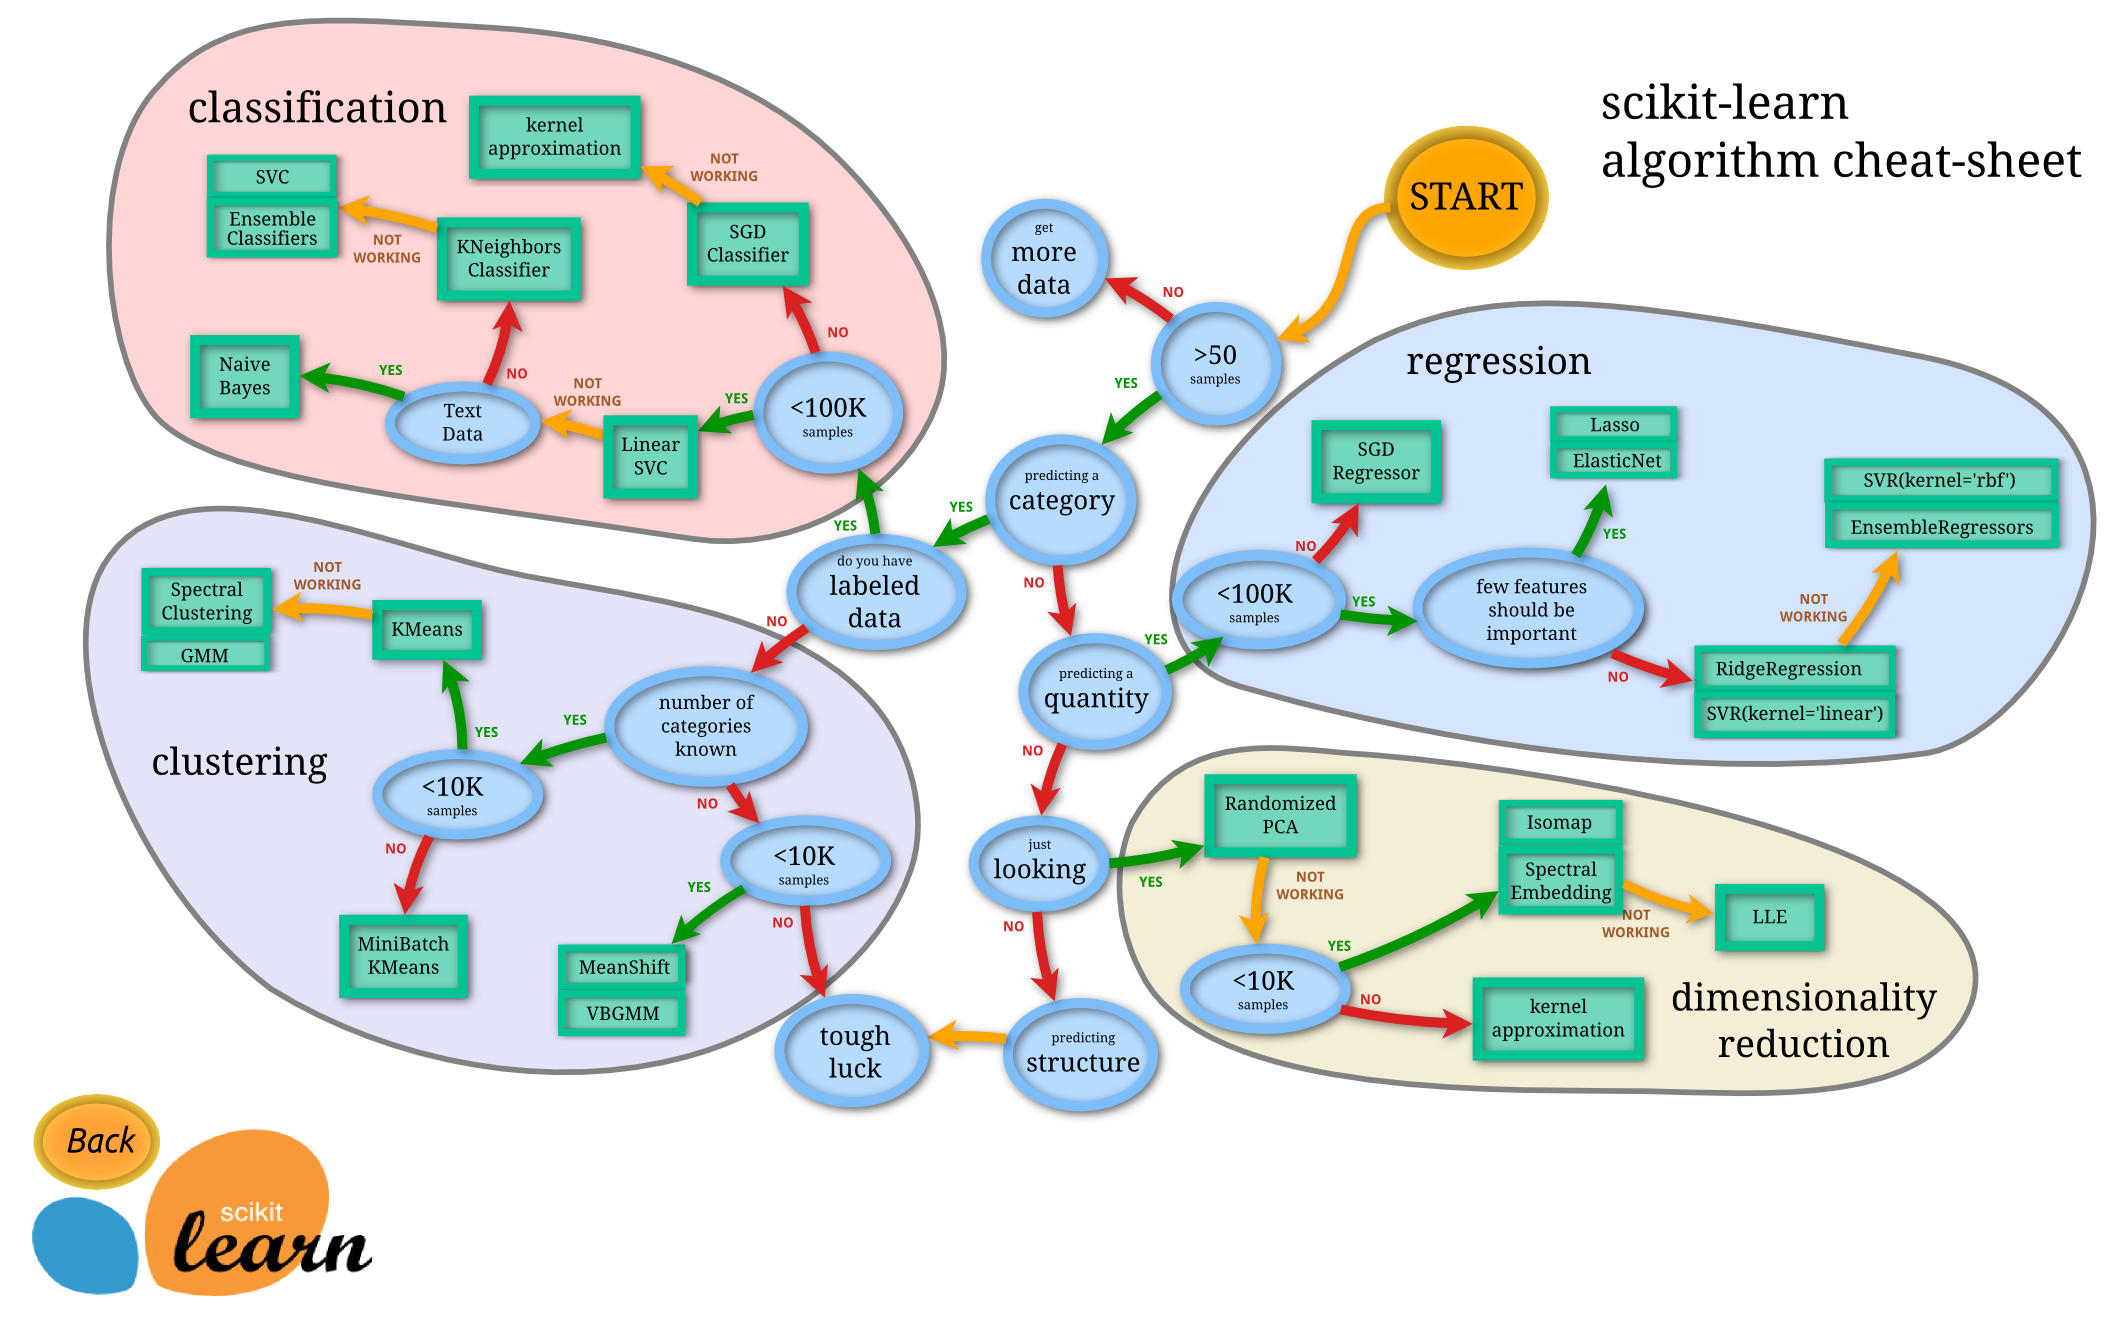

### Option 1: Linear SVC

In [ ]:
#Chia tập train_test
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.2)

#Fit the model
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

#Check the scores
print('Test score:', lsvc.score(X_test, y_test))

Test score: 0.7621621621621621


###Option 2: KNN

In [ ]:
#Chia tập train_test
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.2)

#Fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#Check the scores
print('Test score:', knn.score(X_test, y_test))

Test score: 0.6


### Option 3: Ensemble Learning - Random Forest Classifier

In [ ]:
#Chia tập train_test
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.2)

#Fit the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Check the scores
print('Test score:', clf.score(X_test, y_test))

Test score: 0.7675675675675676


## Đánh giá mô hình

### AUC/ROC

In [ ]:
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00537634, 0.00537634, 0.00537634, 0.02688172, 0.03225806,
       0.03225806, 0.03225806, 0.03225806, 0.04301075, 0.04301075,
       0.04301075, 0.05376344, 0.05913978, 0.06451613, 0.10752688,
       0.12365591, 0.13978495, 0.15591398, 0.16129032, 0.1827957 ,
       0.18817204, 0.20967742, 0.22043011, 0.22580645, 0.24731183,
       0.26344086, 0.26344086, 0.27419355, 0.27419355, 0.27956989,
       0.28494624, 0.29569892, 0.31182796, 0.3172043 , 0.3172043 ,
       0.33333333, 0.34408602, 0.34946237, 0.34946237, 0.34946237,
       0.34946237, 0.35483871, 0.35483871, 0.36021505, 0.3655914 ,
       0.3655914 , 0.37634409, 0.39784946, 0.41935484, 0.43010753,
       0.43548387, 0.4516129 , 0.46236559, 0.54301075, 0.59139785,
       0.65591398, 0.66666667, 0.74731183, 0.77419355, 0.80107527,
       0.83870968, 0.8655914 , 0.88172043, 0.91397849, 0.93010753,
       0.93548387, 0.95698925, 0.98924731, 1.        ])

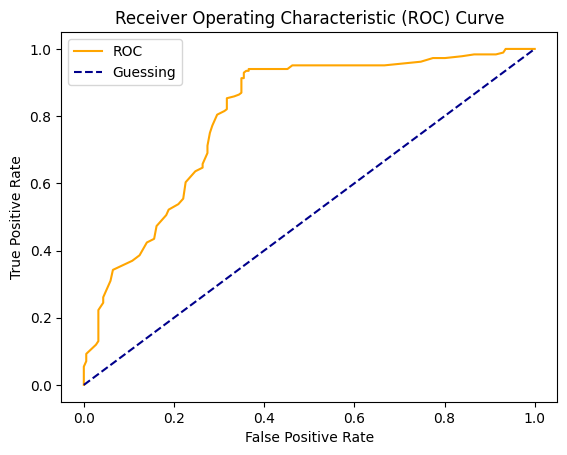

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [ ]:
roc_auc_score_value = roc_auc_score(y_test, y_probs)
roc_auc_score_value

0.8017619214586256

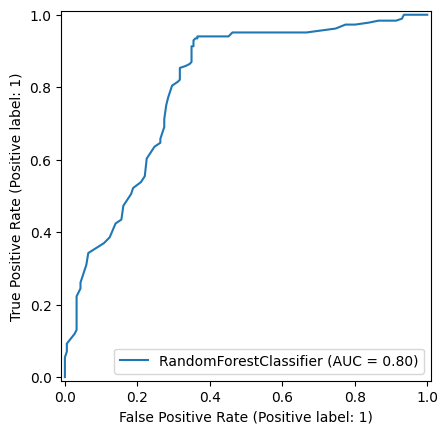

In [ ]:
from sklearn.metrics import RocCurveDisplay
roc_curve_display = RocCurveDisplay.from_estimator(estimator=clf,
                                                   X=X_test,
                                                   y=y_test)

###Confusion Matrix

In [ ]:
y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[127,  59],
       [ 27, 157]])

In [ ]:
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,127,59
1,27,157


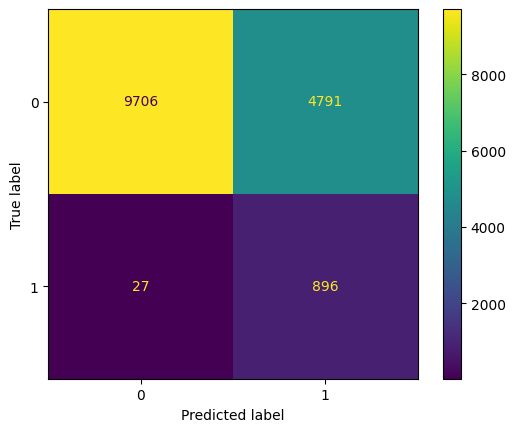

In [ ]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.68      0.75       186
           1       0.73      0.85      0.79       184

    accuracy                           0.77       370
   macro avg       0.78      0.77      0.77       370
weighted avg       0.78      0.77      0.77       370



## Cải thiện mô hình - Tunning

In [ ]:
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
def evaluate_preds(y_true: np.array,
                   y_preds: np.array) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.

    Returns several metrics in the form of a dictionary.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

### Cách 1: Random Search CV

In [ ]:
param_distributions = {"n_estimators": [10, 100, 200, 500],
                       "max_depth": [None, 5, 10],
                       "max_features": ["sqrt", "log2", None],
                       "min_samples_split": [2, 4],
                       "min_samples_leaf": [1, 2]}

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

clf = RandomForestClassifier(n_jobs=-1)

n_iter = 30 # thử khoảng 30 model
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            n_iter=n_iter,
                            cv=5,
                            verbose=2)

rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; to

In [ ]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 5}

In [ ]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 77.30%
Precision: 0.68
Recall: 0.96
F1 score: 0.80


### Cách 2: GridSearch CV

In [ ]:
param_grid = {"n_estimators": [200, 1000],
              "max_depth": [30, 40, 50],
              "max_features": ["log2"],
              "min_samples_split": [2, 4, 6, 8],
              "min_samples_leaf": [4]}

In [ ]:
clf = RandomForestClassifier(n_jobs=-1)

gs_clf = GridSearchCV(estimator=clf,
                      param_grid=param_grid,
                      cv=5,
                      verbose=2)

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=

In [61]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 200}

In [62]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Acc: 76.49%
Precision: 0.68
Recall: 0.94
F1 score: 0.79


{'accuracy': 0.76, 'precision': 0.68, 'recall': 0.94, 'f1': 0.79}

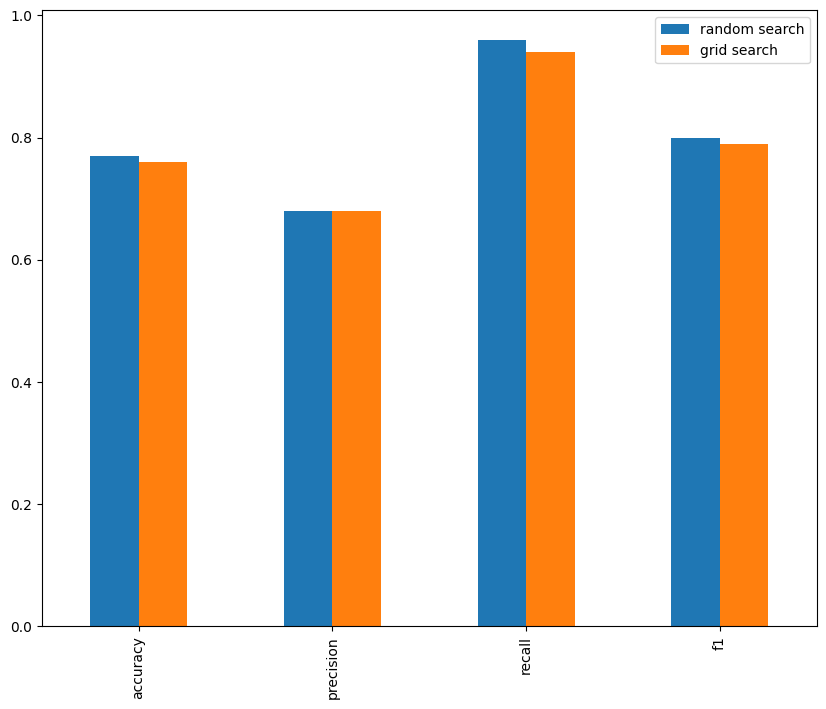

In [63]:
compare_metrics = pd.DataFrame({"random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

Kết luận:

- Mô hình Ensemble Learning RandomForestClassifer là mô hình đạt độ tin cậy cao nhất trong tất cả các chỉ số
- Phương pháp Tunning đạt hiệu quả cao hơn là RandomSearch CV với bộ siêu tham số

##Lưu lại mô hình

In [ ]:
from joblib import dump, load
best_model_file_name_joblib = "leanhhoang_fraud_detection_V0.36.joblib"
dump(rs_metrics, filename=best_model_file_name_joblib)

['leanhhoang_fraud_detection_V0.36.joblib']

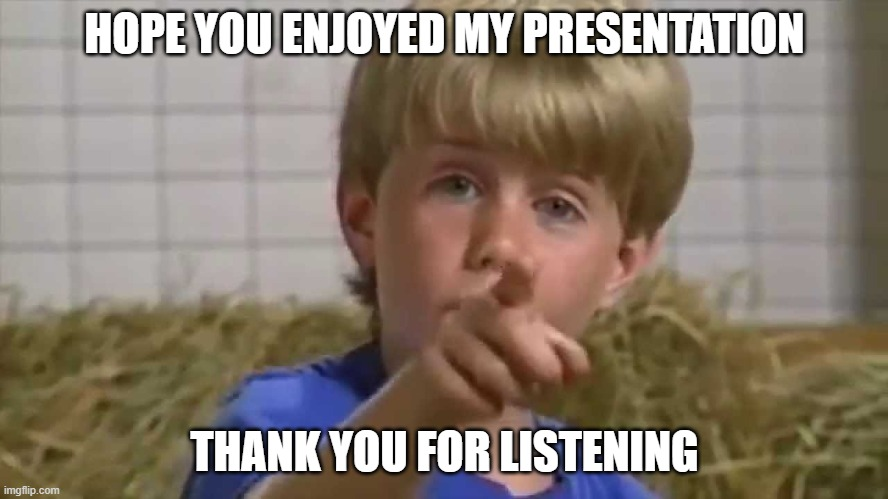